In [1]:
#%% Imports:
import matplotlib
matplotlib.use('MACOSX')

from math import sqrt
import os
import numpy as np
import mne
#import matplotlib #doesnt it import through mne already?
from copy import deepcopy

#Open data:
#sample_data_folder = mne.datasets.sample.data_path()
#kath_raw_file2 = "/Users/jenya/Documents/Oldenburg and university/Job Uni Rieger lab/Katharinas_Data/sub_HT05ND16/210811/mikado-1.fif"
#kath_raw_file = os.path.join('Katharinas_Data','sub_HT05ND16', '210811', 'mikado-1.fif')
kath_raw_file='/Users/jenya/Local Storage/Job Uni Rieger lab/MEG QC code/Katharinas_Data/sub_HT05ND16/210811/mikado-1.fif'
print(kath_raw_file)
#print(kath_raw_file2)                                   
raw = mne.io.read_raw_fif(kath_raw_file)
#raw.crop(0, 60).load_data()  # just use a fraction of data for speed here

#Print info about the data:
print(raw)
print(raw.info)
raw





/Users/jenya/Local Storage/Job Uni Rieger lab/MEG QC code/Katharinas_Data/sub_HT05ND16/210811/mikado-1.fif
Opening raw data file /Users/jenya/Local Storage/Job Uni Rieger lab/MEG QC code/Katharinas_Data/sub_HT05ND16/210811/mikado-1.fif...


/var/folders/h2/khhmb4p510vg63hbv0qkftt80000gs/T/ipykernel_8524/2805200223.py:19: RuntimeWarning: This filename (/Users/jenya/Local Storage/Job Uni Rieger lab/MEG QC code/Katharinas_Data/sub_HT05ND16/210811/mikado-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(kath_raw_file)


    Read a total of 8 projection items:
        magn8_iasoff_68deg.fif : PCA-v1 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v2 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v3 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v4 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v5 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v6 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v7 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v8 (1 x 306)  idle
    Range : 1809000 ... 3375999 =   1809.000 ...  3375.999 secs
Ready.
Opening raw data file /Users/jenya/Local Storage/Job Uni Rieger lab/MEG QC code/Katharinas_Data/sub_HT05ND16/210811/mikado-2.fif...
    Read a total of 8 projection items:
        magn8_iasoff_68deg.fif : PCA-v1 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v2 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v3 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v4 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v5 (1 x 

<Raw | mikado-1.fif, 319 x 3390000 (3390.0 s), ~6.6 MB, data not loaded>

In [2]:
#%% How to look up info and other usefull things. 
# CAN SKIP THIS WHOLE CELL, DOESNT AFFECT FURTHER STUFF

#name of particular channel:
raw.info['chs'][14]['ch_name']
#See all channel names:
print(raw.info['ch_names'])
# see all avalinle info keys
raw.info.keys()

#See unit of channel number 15: (cos indexing from 0)
raw.info['chs'][14]['unit']

# Plot 5 sec of the first 30 channels.
raw.plot(block=True, duration=5, n_channels=30)
# HOW TO PLOT PARTICULAR RANGE OF CHANNELS?

# copy into separate data variable for further manipulations, to not damage the original data:
original_raw = raw.copy()

print(f'Original data had {original_raw.info["nchan"]} channels.')

['IASX+', 'IASX-', 'IASY+', 'IASY-', 'IASZ+', 'IASZ-', 'IAS_DX', 'IAS_DY', 'IAS_X', 'IAS_Y', 'IAS_Z', 'MEG0111', 'MEG0112', 'MEG0113', 'MEG0121', 'MEG0122', 'MEG0123', 'MEG0131', 'MEG0132', 'MEG0133', 'MEG0141', 'MEG0142', 'MEG0143', 'MEG0211', 'MEG0212', 'MEG0213', 'MEG0221', 'MEG0222', 'MEG0223', 'MEG0231', 'MEG0232', 'MEG0233', 'MEG0241', 'MEG0242', 'MEG0243', 'MEG0311', 'MEG0312', 'MEG0313', 'MEG0321', 'MEG0322', 'MEG0323', 'MEG0331', 'MEG0332', 'MEG0333', 'MEG0341', 'MEG0342', 'MEG0343', 'MEG0411', 'MEG0412', 'MEG0413', 'MEG0421', 'MEG0422', 'MEG0423', 'MEG0431', 'MEG0432', 'MEG0433', 'MEG0441', 'MEG0442', 'MEG0443', 'MEG0511', 'MEG0512', 'MEG0513', 'MEG0521', 'MEG0522', 'MEG0523', 'MEG0531', 'MEG0532', 'MEG0533', 'MEG0541', 'MEG0542', 'MEG0543', 'MEG0611', 'MEG0612', 'MEG0613', 'MEG0621', 'MEG0622', 'MEG0623', 'MEG0631', 'MEG0632', 'MEG0633', 'MEG0641', 'MEG0642', 'MEG0643', 'MEG0711', 'MEG0712', 'MEG0713', 'MEG0721', 'MEG0722', 'MEG0723', 'MEG0731', 'MEG0732', 'MEG0733', 'MEG074

In [2]:
#%% Find magnetometers and gradiometers:
# unit t - magenetometer. unit M_T - gradiometer. (in this set name will end with 1 for magnet, 
# with 2and3 for grad.)

mags = []
grads=[]

for i, chs in enumerate(raw.info['chs']):

    if str(chs['unit']).endswith('UNIT_T)'):
        mags.append((chs['ch_name'], i))
    elif str(chs['unit']).endswith('UNIT_T_M)'):
        grads.append((chs['ch_name'], i))

print('Magnetometers: ', mags)
print('Gradiometers: ', grads)

Magnetometers:  [('MEG0111', 11), ('MEG0121', 14), ('MEG0131', 17), ('MEG0141', 20), ('MEG0211', 23), ('MEG0221', 26), ('MEG0231', 29), ('MEG0241', 32), ('MEG0311', 35), ('MEG0321', 38), ('MEG0331', 41), ('MEG0341', 44), ('MEG0411', 47), ('MEG0421', 50), ('MEG0431', 53), ('MEG0441', 56), ('MEG0511', 59), ('MEG0521', 62), ('MEG0531', 65), ('MEG0541', 68), ('MEG0611', 71), ('MEG0621', 74), ('MEG0631', 77), ('MEG0641', 80), ('MEG0711', 83), ('MEG0721', 86), ('MEG0731', 89), ('MEG0741', 92), ('MEG0811', 95), ('MEG0821', 98), ('MEG0911', 101), ('MEG0921', 104), ('MEG0931', 107), ('MEG0941', 110), ('MEG1011', 113), ('MEG1021', 116), ('MEG1031', 119), ('MEG1041', 122), ('MEG1111', 125), ('MEG1121', 128), ('MEG1131', 131), ('MEG1141', 134), ('MEG1211', 137), ('MEG1221', 140), ('MEG1231', 143), ('MEG1241', 146), ('MEG1311', 149), ('MEG1321', 152), ('MEG1331', 155), ('MEG1341', 158), ('MEG1411', 161), ('MEG1421', 164), ('MEG1431', 167), ('MEG1441', 170), ('MEG1511', 173), ('MEG1521', 176), ('MEG

In [4]:
#%%other way (shorter):
mags = [(chs['ch_name'], i) for i, chs in enumerate(raw.info['chs']) if str(chs['unit']).endswith('UNIT_T)')]
print('Magnetometers: ', mags)

grads = [(chs['ch_name'], i) for i, chs in enumerate(raw.info['chs']) if str(chs['unit']).endswith('UNIT_T_M)')]
print('Gradiometers: ', grads)

Magnetometers:  [('MEG0111', 11), ('MEG0121', 14), ('MEG0131', 17), ('MEG0141', 20), ('MEG0211', 23), ('MEG0221', 26), ('MEG0231', 29), ('MEG0241', 32), ('MEG0311', 35), ('MEG0321', 38), ('MEG0331', 41), ('MEG0341', 44), ('MEG0411', 47), ('MEG0421', 50), ('MEG0431', 53), ('MEG0441', 56), ('MEG0511', 59), ('MEG0521', 62), ('MEG0531', 65), ('MEG0541', 68), ('MEG0611', 71), ('MEG0621', 74), ('MEG0631', 77), ('MEG0641', 80), ('MEG0711', 83), ('MEG0721', 86), ('MEG0731', 89), ('MEG0741', 92), ('MEG0811', 95), ('MEG0821', 98), ('MEG0911', 101), ('MEG0921', 104), ('MEG0931', 107), ('MEG0941', 110), ('MEG1011', 113), ('MEG1021', 116), ('MEG1031', 119), ('MEG1041', 122), ('MEG1111', 125), ('MEG1121', 128), ('MEG1131', 131), ('MEG1141', 134), ('MEG1211', 137), ('MEG1221', 140), ('MEG1231', 143), ('MEG1241', 146), ('MEG1311', 149), ('MEG1321', 152), ('MEG1331', 155), ('MEG1341', 158), ('MEG1411', 161), ('MEG1421', 164), ('MEG1431', 167), ('MEG1441', 170), ('MEG1511', 173), ('MEG1521', 176), ('MEG

In [90]:
#%% Found one more way using mne itself (check if shows the same as mine!)
picks_grad = mne.pick_types(raw.info, meg='grad', eeg=False, eog=True, stim=False)
picks_mag = mne.pick_types(raw.info, meg='mag', eeg=False, eog=True, stim=False)

#Yes, shows the same as my code. Gives indexes of mags and grads (starting from 0), but no channel names.

In [ ]:
# %% Pick all meg channels type to calculater RMSE or STD of them.
# Commented as this might be usefull later, but not at the moment.
#This method doesnt separate magnetometers and gradiometers, just meg channels in total.

#picks = mne.pick_types(original_raw.info, meg=True, exclude='bads')  
#data, times = original_raw[picks, :]  

#data now contains all meg channels (magnetometers_gradiometers mixed), it s 2d.
#times is just time vector, same for any tiype of channel.

In [4]:
# Separate data for mags and grads in 2 arrays.
selected_mags = [item[1] for item in mags]
selected_grads = [item[1] for item in grads]
data_mags, times = raw[selected_mags, :]  
data_grads, times = raw[selected_grads, :]  

In [5]:
# %% Calculate STD or RMSE of each channel

#Time how long it takes to calculate STD or RMSE:
import time
t0_std = time.time()

#STD:
std_mags=np.std(data_mags, axis=1) #calculate std of all magnetometers (along second dimantion)
std_grads=np.std(data_grads, axis=1) #calculate std of all gradiometers (along second dimantion)

t1_std = time.time()
total_time_std = t1_std-t0_std

mean_std_magn=np.mean(std_mags) #average std magnetometers
mean_std_grad=np.mean(std_grads) #average std gradiometers

print('Mean of magnetometers data: ', mean_std_magn) #average std
print('Max of magnetometers data: ',max(std_mags)) #highest std
print('Min of magnetometers data: ',min(std_mags)) #lowest std.
print('Mean of gradiometers data: ', mean_std_grad) #average std
print('Max of gradiometers data: ',max(std_grads)) #highest std
print('Min of gradiometers data: ',min(std_grads)) #lowest std.

Mean of magnetometers data:  5.406334593332269e-09
Max of magnetometers data:  7.279099942856678e-09
Min of magnetometers data:  3.979593539593774e-09
Mean of gradiometers data:  4.1068110485773304e-07
Max of gradiometers data:  5.538080097222508e-07
Min of gradiometers data:  2.5143656856750294e-07


In [9]:
#%% RMSE:
# https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python

t0_rmse = time.time()

from sklearn.metrics import mean_squared_error

#Magnitometers:
y_actual_mags=data_mags
y_predicted_mags=data_mags.mean(axis=1)
#yeah i know i dont need to rename it, just easier for me this way to deal with RMSE concept

error_vec_mags = np.zeros(len(y_predicted_mags)) #RMSE of all magnetometers

for i in range(len(y_predicted_mags)):
    #print(i)
    #print(y_actual[i, :])
    #print(y_predicted[i])
    y_predicted_vec_mags=np.ones(len(y_actual_mags[0]))*y_predicted_mags[i]
    error_vec_mags[i] = mean_squared_error(y_actual_mags[i, :], y_predicted_vec_mags, squared=False)

#Gradiometers:
y_actual_grads=data_grads
y_predicted_grads=data_grads.mean(axis=1)
#yeah i know i dont need to rename it, just easier for me this way to deal with RMSE concept

error_vec_grads = np.zeros(len(y_predicted_grads)) #RMSE of all gradiometers

for i in range(len(y_predicted_grads)):
    #print(i)
    #print(y_actual[i, :])
    #print(y_predicted[i])
    y_predicted_vec_grads=np.ones(len(y_actual_grads[0]))*y_predicted_grads[i]
    error_vec_grads[i] = mean_squared_error(y_actual_grads[i, :], y_predicted_vec_grads, squared=False)


print('Mean of magnetometers data: ', np.mean(error_vec_mags)) #average RMSE
print('Max of magnetometers data: ',max(error_vec_mags)) #highest RMSE
print('Min of magnetometers data: ',min(error_vec_mags)) #lowest RMSE
print('Mean of gradiometers data: ', np.mean(error_vec_grads)) #average RMSE
print('Max of gradiometers data: ',max(error_vec_grads)) #highest RMSE
print('Min of gradiometers data: ',min(error_vec_grads)) #lowest RMSE


t1_rmse = time.time()
total_time_rmse = t1_rmse-t0_rmse

print('Time to calculate std: ', total_time_std)
print('Time to calculate rmse: ', total_time_rmse)

#STD CALCULATION IS MUCH LESS COdE BUT TAKES LONGER THAN RMSE


Mean of magnetometers data:  5.406334593332269e-09
Max of magnetometers data:  7.279099942856678e-09
Min of magnetometers data:  3.979593539593774e-09
Mean of gradiometers data:  4.1068110485773304e-07
Max of gradiometers data:  5.538080097222508e-07
Min of gradiometers data:  2.5143656856750294e-07
Time to calculate std:  89.44872212409973
Time to calculate rmse:  10.249632120132446


In [6]:
# %% Pick channel with largest STD (RMSE)?
# HOW DO WE DECIDE WHICH CHANNELS TO PICK? ANY PARTICULSR LIMIT?
# If not - just display here channels with largest STD for user to decide
largest_std_mags= np.where(std_mags == max(std_mags))
largest_std_grads= np.where(std_grads == max(std_grads))

mag_channel_largest_std=mags[largest_std_mags[0][0]]
grad_channel_largest_std=grads[largest_std_grads[0][0]]
print('Magnetometer with largest STD: ', mag_channel_largest_std[0])
print('Gradiometer with largest STD: ', grad_channel_largest_std[0])

Magnetometer with largest STD:  MEG2311
Gradiometer with largest STD:  MEG1542


In [45]:
# Check if channel data is within 1 std over all channels.

std_std_mags=np.std(std_mags)
std_std_grads=np.std(std_grads)

mean_std_mags=np.mean(std_mags)
mean_std_grads=np.mean(std_grads)

ch_large_std_mags= np.where(std_mags > mean_std_magn+std_std_mags) # | std_mags < mean_std_magn-std_std_mags)
ch_large_std_grads= np.where(std_grads > mean_std_grads+std_std_grads) # | std_grads < mean_std_grad-std_std_grads)

ch_small_std_mags= np.where(std_mags < mean_std_magn-std_std_mags)
ch_small_std_grads= np.where(std_grads < mean_std_grads-std_std_grads)


#print(ch_large_std_mags[0])

magn_channel_big_std=np.array(mags)[ch_large_std_mags[0]]
grad_channel_big_std=np.array(grads)[ch_large_std_grads[0]]

magn_channel_small_std=np.array(mags)[ch_small_std_mags[0]]
grad_channel_small_std=np.array(grads)[ch_small_std_grads[0]]

print('Magnetometers with high STD: ', magn_channel_big_std)
print('Gradiometers with high STD: ',grad_channel_big_std)

print('Magnetometers with low STD: ', magn_channel_small_std)
print('Gradiometers with low STD: ',grad_channel_small_std)


#why is MEG0223 not detected as noisy?

Magnetometers with high STD:  [['MEG0141' '20']
 ['MEG0221' '26']
 ['MEG0311' '35']
 ['MEG0321' '38']
 ['MEG0611' '71']
 ['MEG0711' '83']
 ['MEG0941' '110']
 ['MEG1331' '155']
 ['MEG1521' '176']
 ['MEG1641' '194']
 ['MEG1721' '200']
 ['MEG1811' '209']
 ['MEG2031' '239']
 ['MEG2121' '248']
 ['MEG2311' '269']
 ['MEG2341' '278']
 ['MEG2511' '293']
 ['MEG2611' '305']]
Gradiometers with high STD:  [['MEG0212' '24']
 ['MEG0332' '42']
 ['MEG0413' '49']
 ['MEG0543' '70']
 ['MEG0623' '76']
 ['MEG1012' '114']
 ['MEG1042' '123']
 ['MEG1132' '132']
 ['MEG1133' '133']
 ['MEG1213' '139']
 ['MEG1312' '150']
 ['MEG1322' '153']
 ['MEG1422' '165']
 ['MEG1433' '169']
 ['MEG1442' '171']
 ['MEG1532' '180']
 ['MEG1533' '181']
 ['MEG1542' '183']
 ['MEG1623' '190']
 ['MEG1632' '192']
 ['MEG1723' '202']
 ['MEG1832' '216']
 ['MEG1833' '217']
 ['MEG1912' '222']
 ['MEG2013' '235']
 ['MEG2023' '238']
 ['MEG2043' '244']
 ['MEG2113' '247']
 ['MEG2142' '255']
 ['MEG2143' '256']
 ['MEG2313' '271']
 ['MEG2323' '274']
 

In [43]:
#Plot the 1 std over channels:

from matplotlib import pyplot as plt
#%matplotlib qt
#%matplotlib inline

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('STDs')
ax1.plot(list(range(1, 103)), std_mags)
ax1.plot(list(range(1, 103)), [mean_std_mags]*102)
ax1.plot(list(range(1, 103)), [mean_std_mags-std_std_mags]*102)
ax1.plot(list(range(1, 103)), [mean_std_mags+std_std_mags]*102)
ax1.set(xlabel='Magnetometer', ylabel='STD')

ax2.plot(list(range(1, 205)), std_grads)
ax2.plot(list(range(1, 205)), [mean_std_grads]*204)
ax2.plot(list(range(1, 205)), [mean_std_grads-std_std_grads]*204)
ax2.plot(list(range(1, 205)), [mean_std_grads+std_std_grads]*204)
ax2.set(xlabel='Gradiometer', ylabel='STD')

plt.show()

#IS THIS UNDESTANDING OF STD OVER CHANNELS CORRECT? SHOULD WE STILL KEEP CHANNELS WITH STD UNDER -1 OR NOT?

In [11]:
#%% Now want to see for example 2 channels with highest std: 
#chans = ['MEG2311', 'MEG1542']
noisy_chans = [mag_channel_largest_std[0], grad_channel_largest_std[0]]
chan_idxs = [raw.ch_names.index(ch) for ch in noisy_chans]
#original_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4) #plot here only a part of channel.

<MNEBrowseFigure size 1600x1600 with 5 Axes>

In [ ]:
# %% ADD CHANNELS TO BADS. 
# In case we want to!

original_bads = deepcopy(raw.info['bads'])
#raw.info['bads'].append('EEG 050')               # add a single channel
#raw.info['bads'].extend(['EEG 051', 'EEG 052'])  # add a list of channels
#bad_chan = raw.info['bads'].pop(-1)  # remove the last entry in the list
#raw.info['bads'] = original_bads     # change the whole list at once

#Add to bads only channels with big STD (both grads and mags):
for m in magn_channel_big_std:
	raw.info['bads'].append(m[0])

for g in grad_channel_big_std:
	raw.info['bads'].append(g[0])

print(raw.info['bads'])

In [66]:
#%% Extracting events and then epoching the data:
# 
# "STIM channels record voltages (usually short, rectangular DC pulses of fixed magnitudes sent from 
# the experiment-controlling computer) that are time-locked to experimental events, such as the 
# onset of a stimulus or a button-press response by the subject (those pulses are sometimes called 
# TTL pulses, event pulses, trigger signals, or just “triggers”). In other cases, these pulses may 
# not be strictly time-locked to an experimental event, but instead may occur in between trials 
# to indicate the type of stimulus (or experimental condition) that is about to occur on the 
# upcoming trial."

#Look at the stimulus channel (can limit to only 3-6 sec here for example, or not):
#raw.copy().pick_types(meg=False, stim=True).plot(start=3, duration=6)
raw.copy().pick_types(meg=False, stim=True).plot()

events = mne.find_events(raw, stim_channel='STI101', min_duration=1.2)

# WHAT IS OPTIMAL DURATION? GIVES DIFFERENT NUMBER OF EVENTS ACCORDING TO DURATION. 
# min_duration: The minimum duration of a change in the events channel required to consider it as an event (in seconds).

# STI101 is stim data in this file. might be different name in another! 
# (it can be STI 014 in older systems for example). 
# There can as well be several sti channels, and we need the main one which summs all the others.
# HERE WRITE THE CODE THAT WILL AUTOMATICALLY DETECT THE MAIN STI CHANNEL OR allow mne to find it itself
# (see long comment below)
# ...

#now look at events:
print(events[:5])  # show the first 5

#Look at events:
fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp) #, event_id=event_dict)
#fig.subplots_adjust(right=0.7)  # make room for legend

# "The resulting events array is an ordinary 3-column NumPy array, with sample number in the first column 
# and integer event ID in the last column; the middle column is usually ignored. Rather than keeping 
# track of integer event IDs, we can provide an event dictionary that maps the integer IDs to experimental 
# conditions or events."

#"If you don’t provide the name of a STIM channel, find_events will first look for MNE-Python 
# config variables for variables MNE_STIM_CHANNEL, MNE_STIM_CHANNEL_1, etc. If those are not 
# found, channels STI 014 and STI101 are tried, followed by the first channel with type “STIM” 
# present in raw.ch_names. If you regularly work with data from several different MEG systems 
# with different STIM channel names, setting the MNE_STIM_CHANNEL config variable may not be 
# very useful, but for researchers whose data is all from a single system it can be a time-saver 
# to configure that variable once and then forget about it."

# findevents description:
# https://mne.tools/stable/generated/mne.find_events.html#mne.find_events
# https://mne.tools/stable/auto_tutorials/intro/20_events_from_raw.html

Removing projector <Projection | magn8_iasoff_68deg.fif : PCA-v1, active : False, n_channels : 306>
Removing projector <Projection | magn8_iasoff_68deg.fif : PCA-v2, active : False, n_channels : 306>
Removing projector <Projection | magn8_iasoff_68deg.fif : PCA-v3, active : False, n_channels : 306>
Removing projector <Projection | magn8_iasoff_68deg.fif : PCA-v4, active : False, n_channels : 306>
Removing projector <Projection | magn8_iasoff_68deg.fif : PCA-v5, active : False, n_channels : 306>
Removing projector <Projection | magn8_iasoff_68deg.fif : PCA-v6, active : False, n_channels : 306>
Removing projector <Projection | magn8_iasoff_68deg.fif : PCA-v7, active : False, n_channels : 306>
Removing projector <Projection | magn8_iasoff_68deg.fif : PCA-v8, active : False, n_channels : 306>
Trigger channel has a non-zero initial value of 18 (consider using initial_event=True to detect this event)
37 events found
Event IDs: [ 9 19 20 21 22]
[[1809872      18      19]
 [1817325       8    

/var/folders/h2/khhmb4p510vg63hbv0qkftt80000gs/T/ipykernel_8524/539764450.py:15: RuntimeWarning: Trigger channel contains negative values, using absolute value. If data were acquired on a Neuromag system with STI016 active, consider using uint_cast=True to work around an acquisition bug
  events = mne.find_events(raw, stim_channel='STI101', min_duration=1.2)


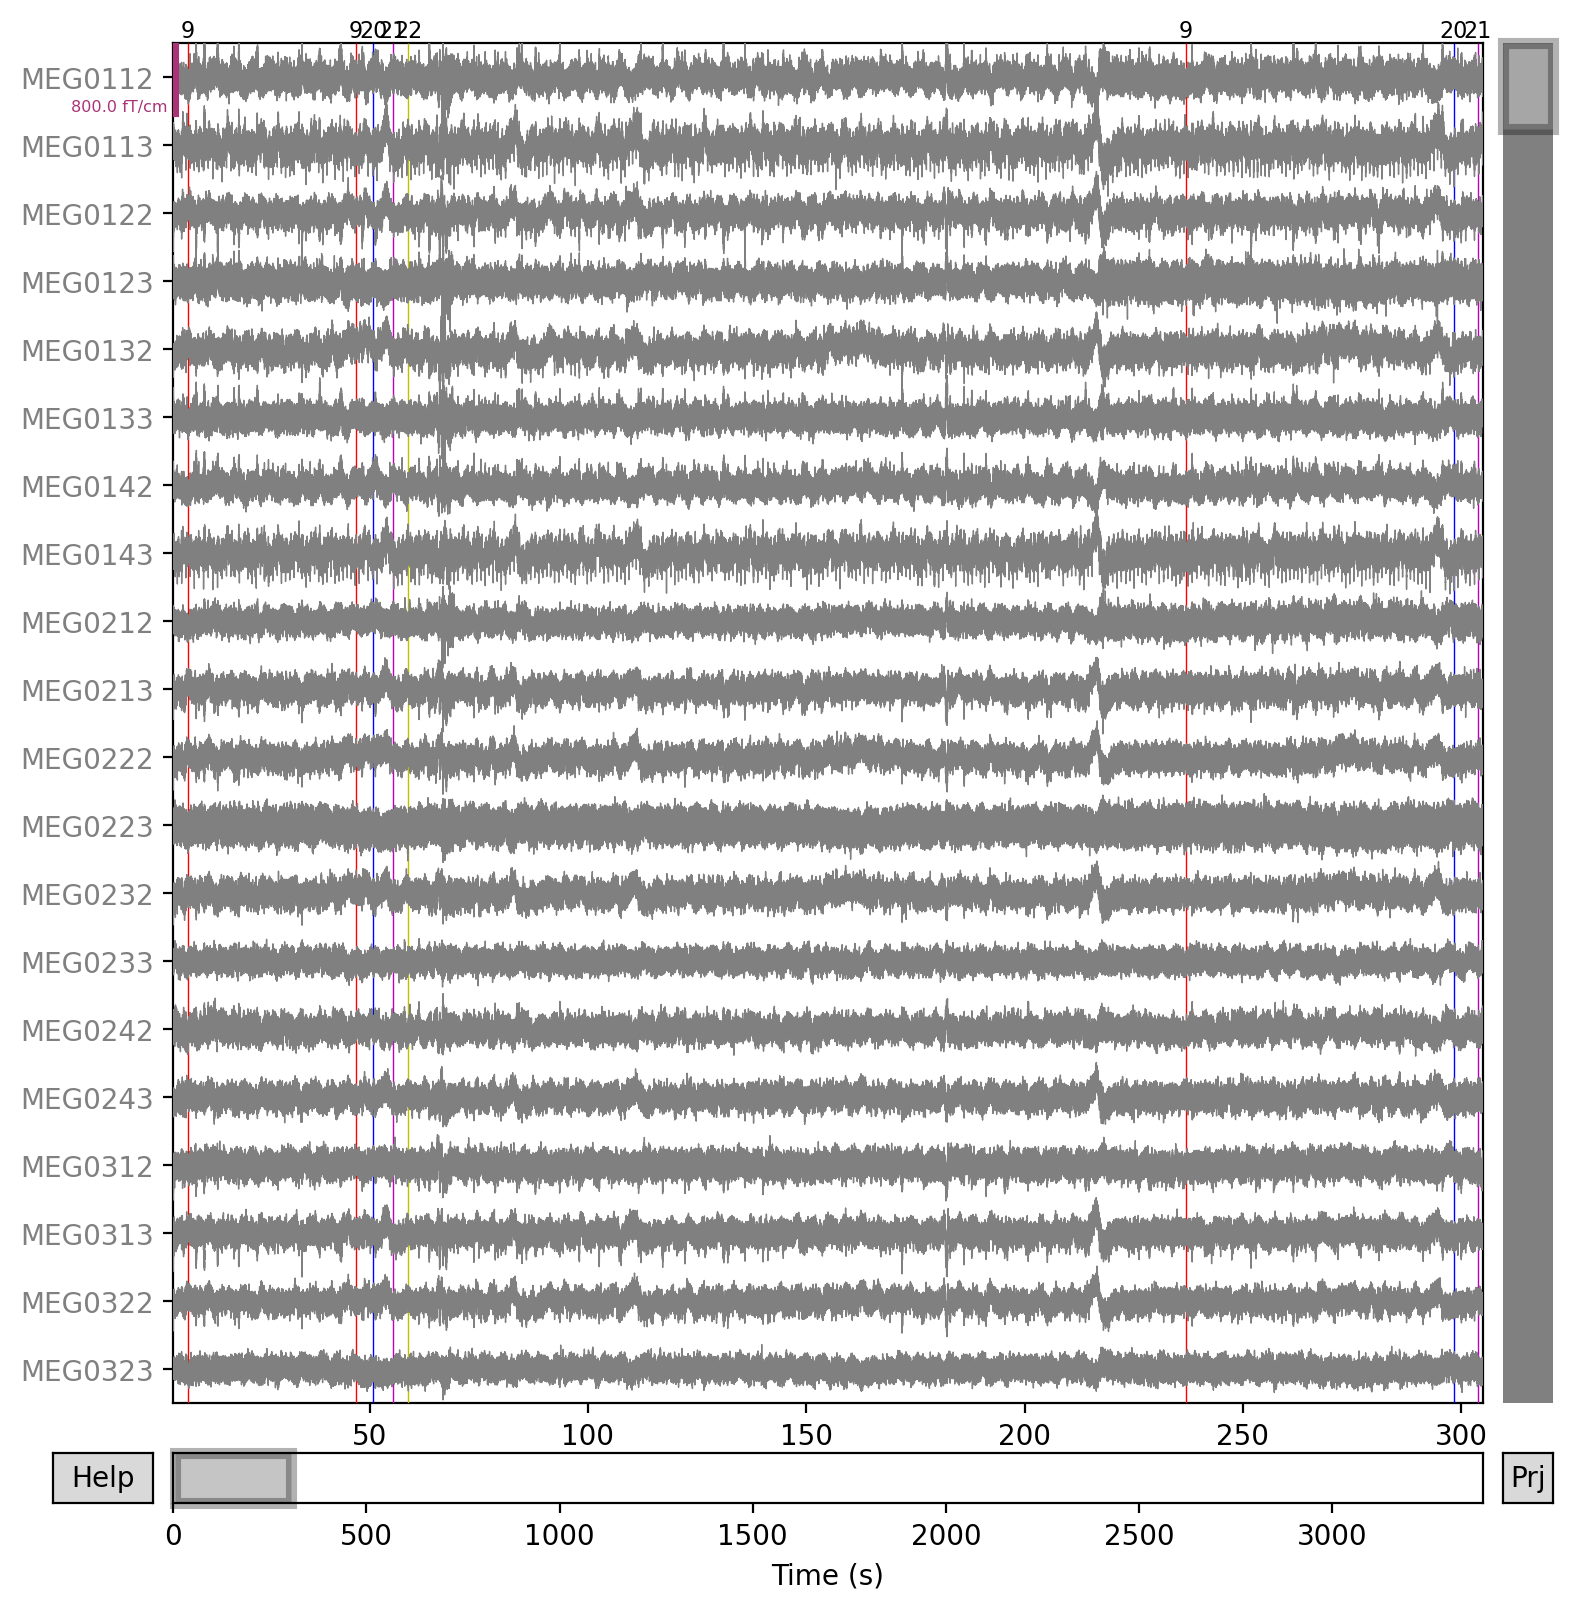

In [68]:
#Plots events with the data:

raw.plot(events=events, start=5, duration=300, color='gray',
         event_color={9: 'r', 19: 'g', 20: 'b', 21: 'm', 22: 'y'})


In [ ]:
# Continue working with events - extra features:

# How to detect events to then epoch data:
#https://mne.tools/stable/auto_tutorials/intro/10_overview.html#sphx-glr-auto-tutorials-intro-10-overview-py


#create even dictionary if needed:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}

#This here would allow to reject particular epochs in data. Values are copied from tutorial.
#We would need to first epoch our own data, calculate std over different epochs and channels 
# and then decide which values to put here.

reject_criteria = dict(mag=4000e-15,     # 4000 fT
                       grad=4000e-13,    # 4000 fT/cm
                       eeg=150e-6,       # 150 µV
                       eog=250e-6)       # 250 µV



In [ ]:
#For some experiments (such as those intending to analyze resting-state activity) there may not 
# be any experimental events included in the raw recording. In such cases, an Events array of 
# equally-spaced events can be generated using mne.make_fixed_length_events():

new_events = mne.make_fixed_length_events(raw, start=5, stop=50, duration=2.)

#By default, the events will all be given the integer Event ID of 1, but you can change that 
# with the id parameter. It is also possible to specify an overlap duration — i.e., if you ultimately
#  want epochs that are 2.5 seconds long, but you want them to overlap by 0.5 seconds, you can specify 
# duration=2.5, overlap=0.5 in the call to make_fixed_length_events() (this will yield the same spacing 
# of events as duration=2, overlap=0).

In [69]:
#Epoching the data:

epochs = mne.Epochs(raw, events, tmin=-0.2, tmax=0.5, preload=True, baseline = None) #, event_id=event_dict, reject=reject_criteria)
# tmin, tmax: float. Start and end time of the epochs in seconds, relative to the time-locked event. Defaults to -0.2 and 0.5, respectively.

print(epochs)

Not setting metadata
Not setting metadata
37 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 8)
8 projection items activated
Loading data for 37 events and 701 original time points ...
0 bad epochs dropped
<Epochs |  37 events (all good), -0.2 - 0.5 sec, baseline off, ~69.7 MB, data loaded,
 '19': 1
 '20': 9
 '21': 11
 '22': 5
 '9': 11>


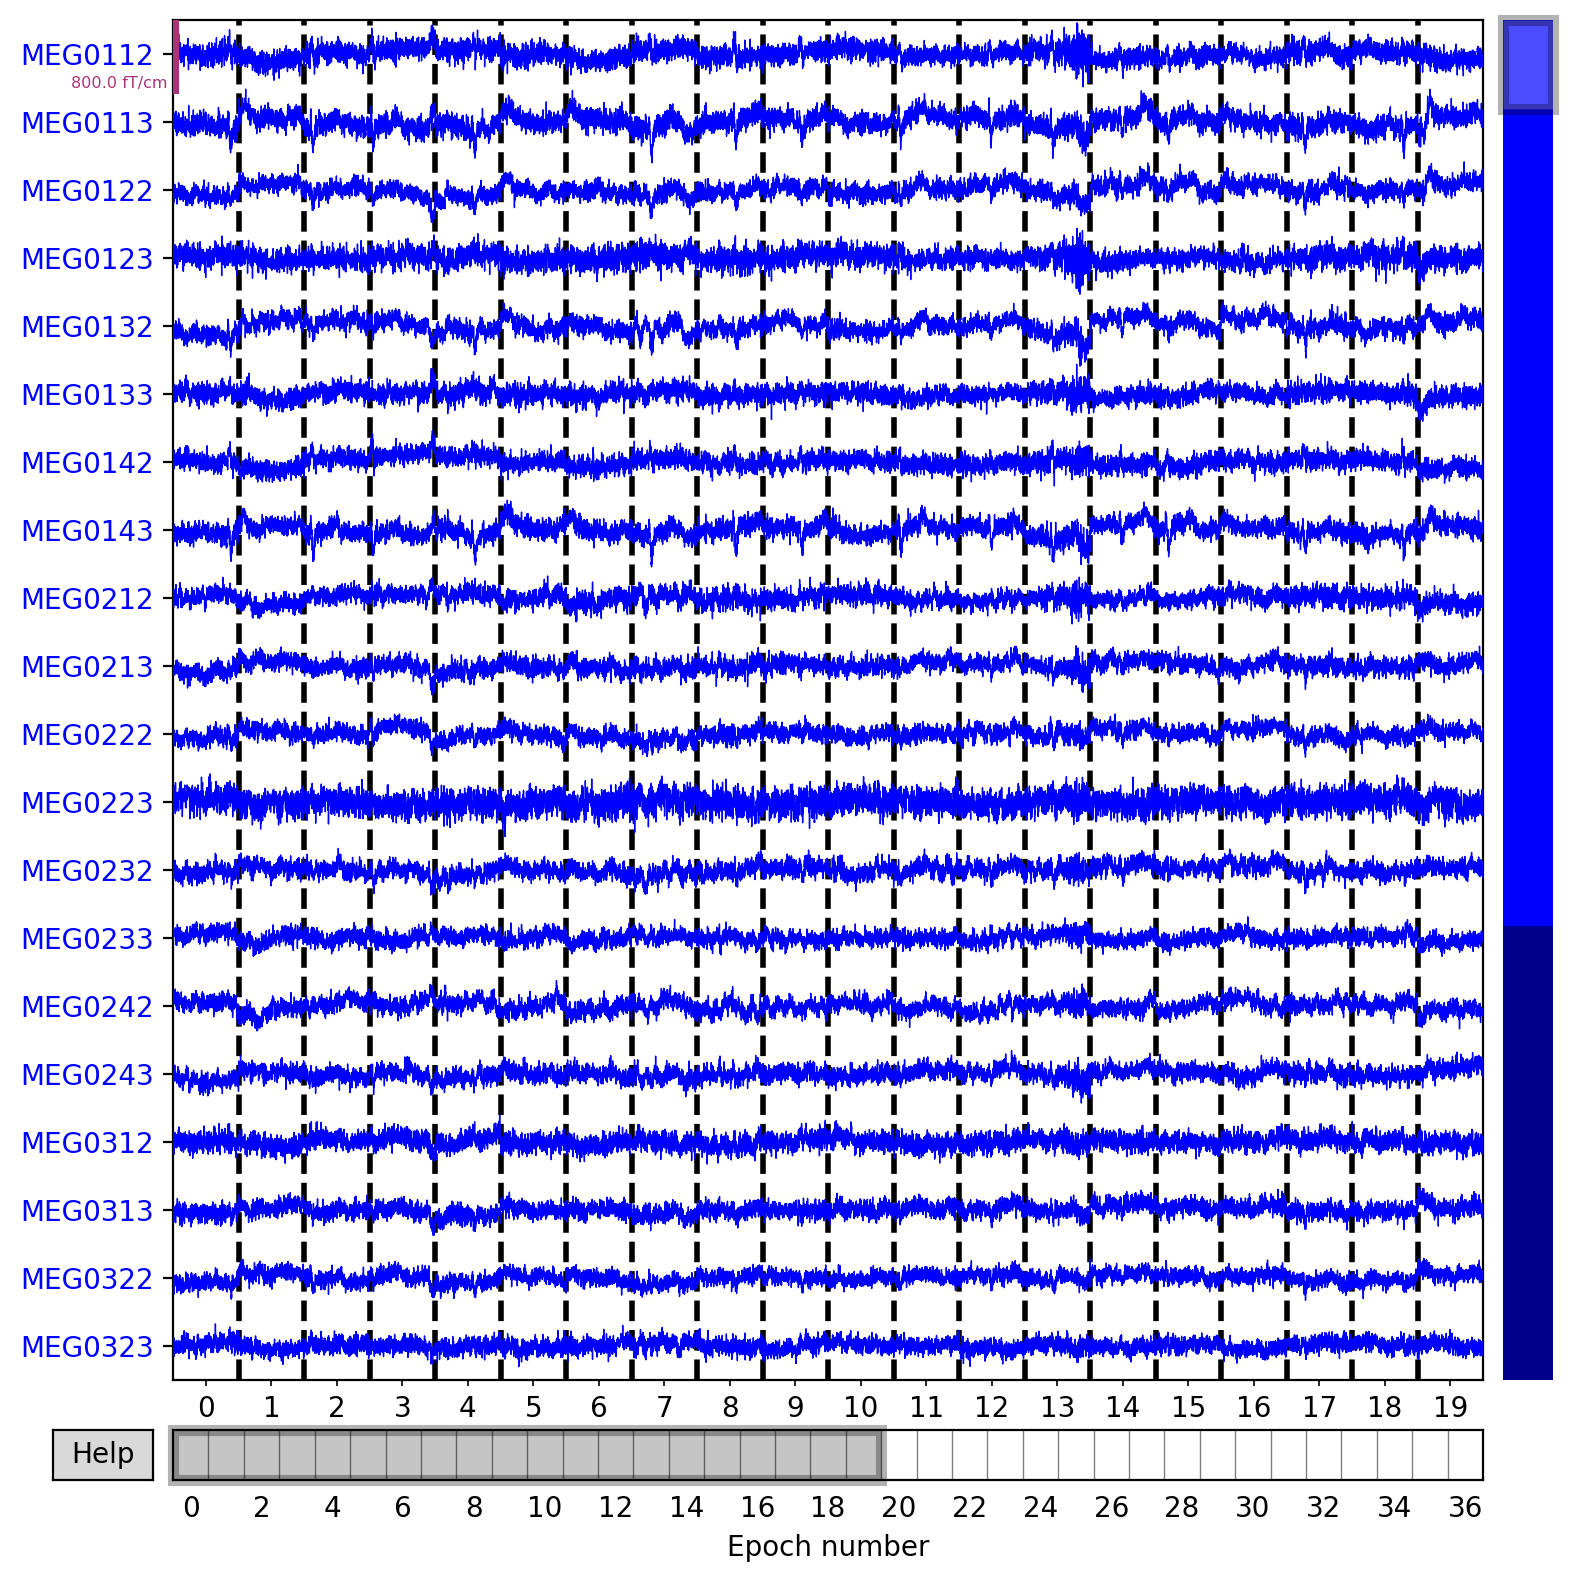

In [71]:
epochs.plot()

#why does it create equally spaced intervals? events were not equally spaced.
#By default plots channels grouped by type: first grads, then mags.

epochs.plot_sensors(kind='3d', ch_type='all')




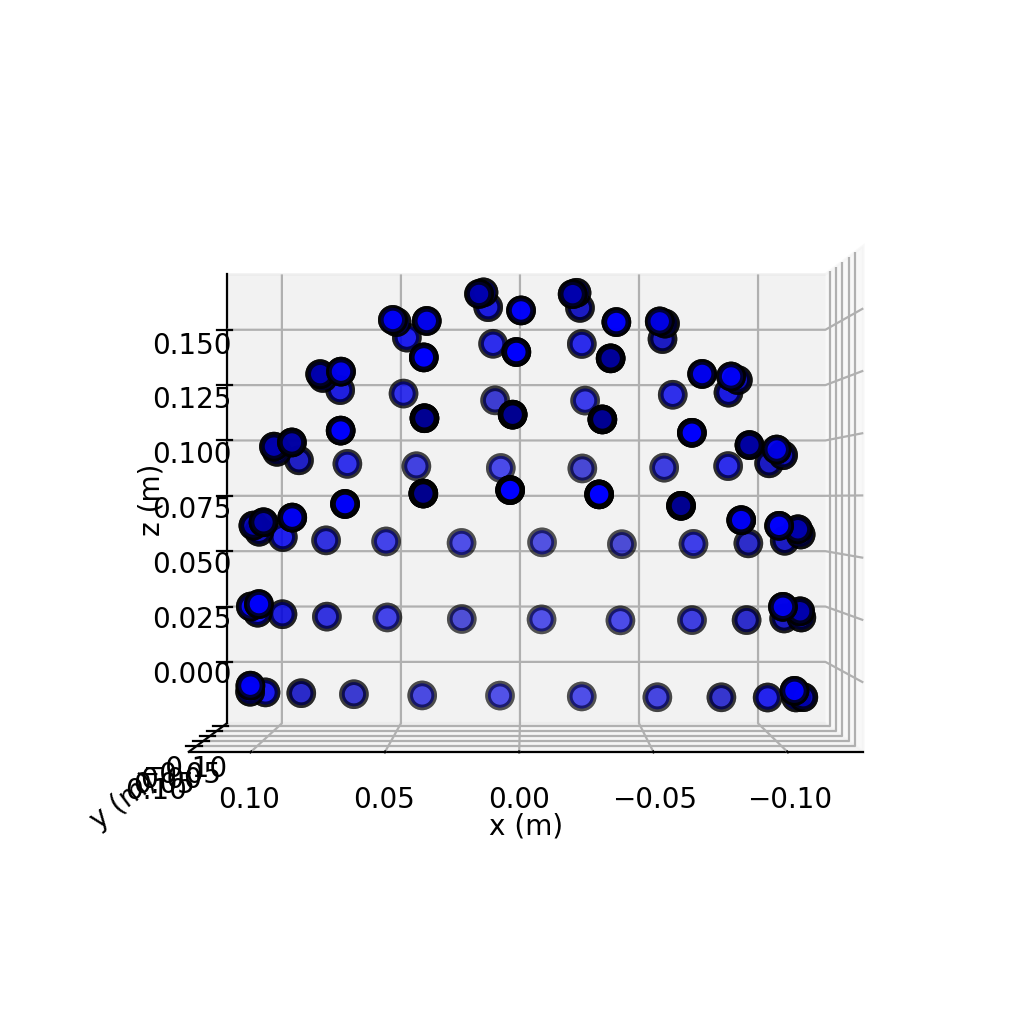

In [73]:
epochs.plot_sensors(kind='3d', ch_type='all')

In [83]:
#df = epochs.to_data_frame()
df = epochs.to_data_frame(time_format=None, scalings=dict(mag=1, grad=1))
df.iloc[:10, :18]

#by default, channel measurement values are scaled so that EEG data are converted 
# to µV, magnetometer data are converted to fT, and gradiometer data are converted 
# to fT/cm. These scalings can be customized through the scalings parameter, or 
# suppressed by passing scalings=dict(eeg=1, mag=1, grad=1).



,time,condition,epoch,IASX+,IASX-,IASY+,IASY-,IASZ+,IASZ-,IAS_DX,IAS_DY,IAS_X,IAS_Y,IAS_Z,MEG0111,MEG0112,MEG0113,MEG0121
0,-0.200,19,0,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.095108e-29,-5.180752e-29,-1.192093e-06,0.0,0.000000,0.000000,0.000000,-1.052550e-13,2.190399e-12,-3.186035e-12,-1.010281e-13
1,-0.199,19,0,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,0.0,0.000000,0.000000,-0.000001,-7.176393e-14,3.982544e-12,-8.164215e-12,-6.989817e-14
2,-0.198,19,0,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,0.0,-0.000001,0.000000,-0.000001,-5.981908e-14,6.969452e-12,-1.115112e-11,-6.188627e-14
3,-0.197,19,0,7.974282e-29,-1.192093e-06,-9.600046e-31,2.019014e-29,-1.192093e-06,-1.192093e-06,7.317702e-30,0.0,-0.000001,0.000000,-0.000001,-2.597581e-14,-2.190399e-12,3.783417e-12,-2.902860e-15
4,-0.196,19,0,7.337872e-29,7.717356e-29,5.197823e-30,1.919949e-29,-1.581347e-29,-7.481316e-29,8.938612e-30,0.0,-0.000001,0.000000,0.000000,1.149084e-14,-4.978180e-12,8.363342e-12,-6.599419e-15
5,-0.195,19,0,4.459080e-29,6.202364e-29,9.970932e-30,1.589732e-29,-1.546112e-29,-7.603882e-29,1.056488e-29,0.0,-0.000001,0.000000,0.000000,-3.331520e-14,-3.982544e-12,9.956360e-13,-3.344868e-14
6,-0.194,19,0,4.271062e-29,5.905163e-29,1.590544e-29,1.328043e-29,-4.295563e-30,-4.300538e-29,2.920852e-30,0.0,0.000000,-0.000001,0.000000,-2.940202e-14,1.792145e-12,2.190399e-12,-4.021531e-14
7,-0.193,19,0,-1.192093e-06,5.505021e-29,-1.192093e-06,-1.192093e-06,1.873850e-30,-2.655854e-29,8.084068e-31,0.0,0.000000,-0.000001,0.000000,-3.989773e-14,8.363342e-12,4.181671e-12,-7.233914e-14
8,-0.192,19,0,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.097199e-31,-3.041578e-29,5.248226e-30,0.0,0.000000,-0.000001,0.000000,-8.569238e-14,7.965088e-13,-1.792145e-12,-1.137471e-13
9,-0.191,19,0,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-2.309672e-30,-3.739963e-29,9.928645e-30,0.0,0.000000,-0.000001,0.000000,1.537218e-14,2.787781e-12,0.000000e+00,-1.223164e-13


In [86]:
df.head()

,time,condition,epoch,IASX+,IASX-,IASY+,IASY-,IASZ+,IASZ-,IAS_DX,...,MEG2622,MEG2623,MEG2631,MEG2632,MEG2633,MEG2641,MEG2642,MEG2643,STI101,SYS201
0,-0.200,19,0,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.095108e-29,-5.180752e-29,-1.192093e-06,...,1.194763e-12,7.765961e-12,-1.547003e-13,-9.358978e-12,-7.367706e-12,-7.218119e-14,-1.373978e-11,6.571197e-12,18.0,0.0
1,-0.199,19,0,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,...,1.015549e-11,-5.575562e-12,-8.445258e-14,-4.779053e-12,-6.571197e-12,4.878084e-14,-5.575562e-12,8.960724e-12,18.0,0.0
2,-0.198,19,0,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,-1.192093e-06,...,5.575562e-12,-1.533279e-11,-1.631808e-14,-8.363342e-12,-1.373978e-11,1.435712e-13,-3.783417e-12,7.765961e-12,18.0,0.0
3,-0.197,19,0,7.974282e-29,-1.192093e-06,-9.600046e-31,2.019014e-29,-1.192093e-06,-1.192093e-06,7.317702e-30,...,1.991272e-12,1.991272e-12,-9.371890e-14,-1.095200e-11,-1.294327e-11,2.456428e-15,-7.765961e-12,5.973816e-13,18.0,0.0
4,-0.196,19,0,7.337872e-29,7.717356e-29,5.197823e-30,1.919949e-29,-1.581347e-29,-7.481316e-29,8.938612e-30,...,9.159851e-12,1.413803e-11,-1.693029e-13,-1.593018e-12,-1.991272e-13,-1.668383e-13,1.991272e-12,4.978180e-12,18.0,0.0


In [163]:
# 1.Loop over the epochs of each channel and check for every separate mag and grad and calculate std
# 2.Check which epochs for which channel.. are outside of 1 std over all channels? Or over this epoch for all channels?
# 3. Add to bads or just show: noisy epoch for partucukar channel? or the whole channel? or the whole epoch?

# Also: noticed some epochs have lower values for all channels, whike they might have still the same std. What to do about them?

# Additional: make RMSE calculation into a function? STD is one line, but takes longer.


# Extract elements from the numbers list for which check_even() returns True
#stuff = filter(lambda item: item[1].epoch == 0, enumerate(df.iloc))

import pandas as pd
eps=list(range(0,len(events))) #list of epoch numbers
mags_names = [mag[0] for mag in mags]

#print(mags_names)

dict = {}

for ep in eps: #loop over each epoch
    rows_for_ep = [row for row in df.iloc if row.epoch == ep]

    std_result = []

    for chan_name in mags_names: #loops over each magnetometer inside the epoch
        
        data_ch_epoch = [row[chan_name] for row in rows_for_ep]

        std_ch_ep = np.std(data_ch_epoch)

        std_result.append(std_ch_ep)

    dict[ep] = std_result

dataframe = pd.DataFrame(dict, index=mags_names)

print(dataframe)

#print(list(df.iloc[:, 12]).index(0))

                   0             1             2             3             4   \
MEG0111  1.583640e-13  1.210799e-13  1.390085e-13  1.775494e-13  1.651350e-13   
MEG0121  1.059030e-13  1.291668e-13  1.004039e-13  1.797146e-13  1.119921e-13   
MEG0131  9.950093e-14  1.076531e-13  1.066932e-13  1.309388e-13  1.232381e-13   
MEG0141  1.273083e-13  1.142171e-13  1.217344e-13  1.689213e-13  1.345682e-13   
MEG0211  1.186469e-13  1.164693e-13  1.281944e-13  1.072132e-13  1.285570e-13   
...               ...           ...           ...           ...           ...   
MEG2541  2.202313e-13  1.900062e-13  2.334243e-13  2.274519e-13  2.186936e-13   
MEG2611  1.577270e-13  1.560958e-13  1.611886e-13  1.368749e-13  1.437156e-13   
MEG2621  1.764023e-13  1.175234e-13  1.468371e-13  1.953602e-13  1.809968e-13   
MEG2631  1.663998e-13  1.374143e-13  1.463150e-13  1.865204e-13  1.675404e-13   
MEG2641  1.456925e-13  1.394288e-13  1.331275e-13  1.176845e-13  1.309647e-13   

                   5       

In [ ]:
#to check that calcukations were right:

ch2622=df.iloc[0:700, 10]

data_ch_epoch = [row[chan_name] for row in rows_for_ep]

In [93]:
print(df.iloc[:, 2])

0         0
1         0
2         0
3         0
4         0
         ..
25932    36
25933    36
25934    36
25935    36
25936    36
Name: epoch, Length: 25937, dtype: int64


In [98]:
print(list(range(0,len(events))))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
